In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('BancoDeDados.csv')
df.info() # perfil dos dados, variáveis e tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [3]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [4]:
# Vamos montar uma função para fazer uma visualização mais intuitiva das variáveis. 

In [5]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))
    
    g = sns.countplot(x= st,data=dados,orient='h')
    g.set_ylabel('Contagem',fontsize=17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),
              ha = 'center',va='bottom',fontsize=12)
        
    g.set_ylim(0,max(sizes)*1.1)

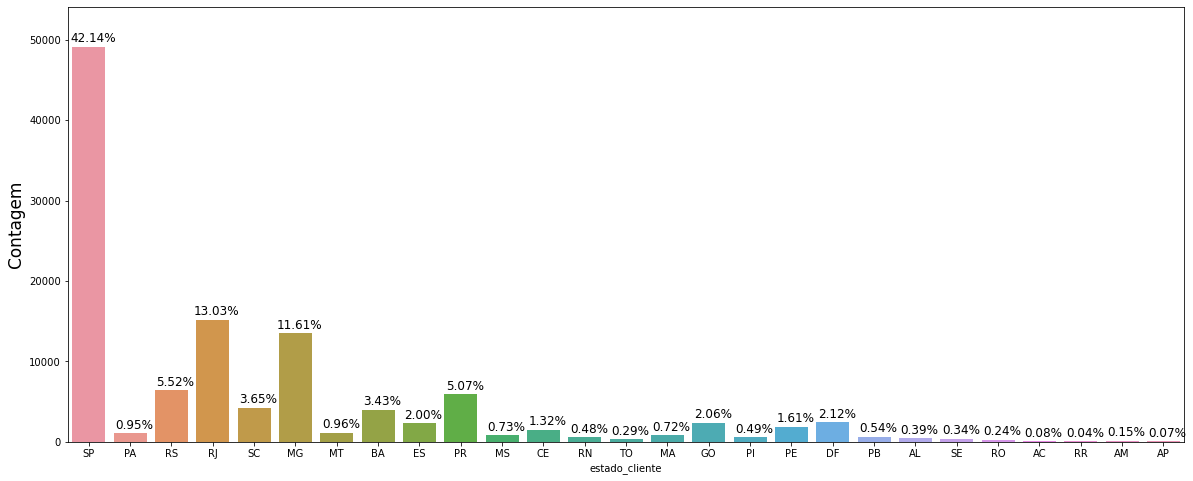

In [6]:
plot_perc('estado_cliente', df)
# maioria de clientes em SP, seguido de RJ, MG e RS...

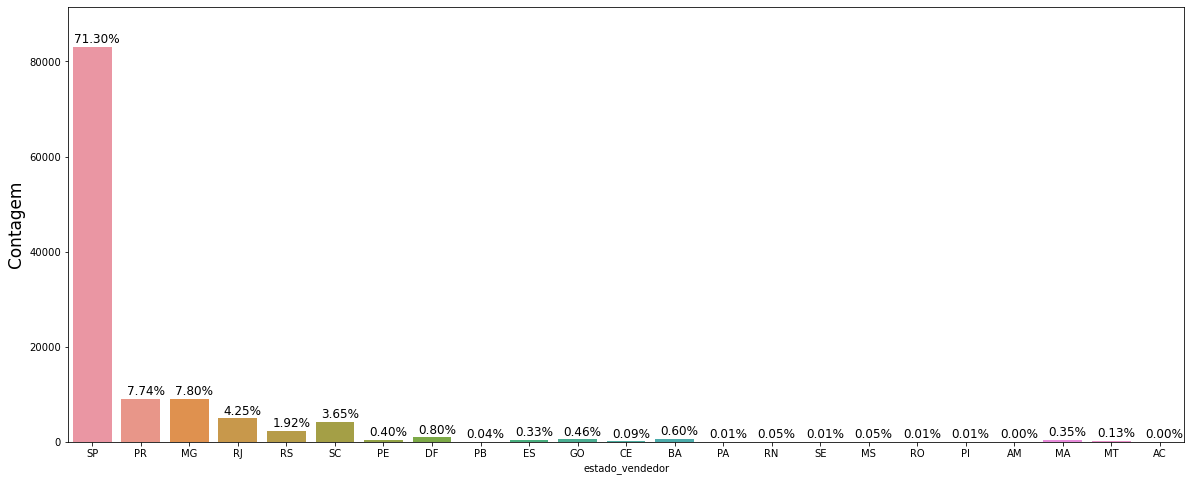

In [7]:
plot_perc ('estado_vendedor',df)
# maioria de vendedores em SP? 
# insight: poderíamos incentivar vendedores de outros estados.

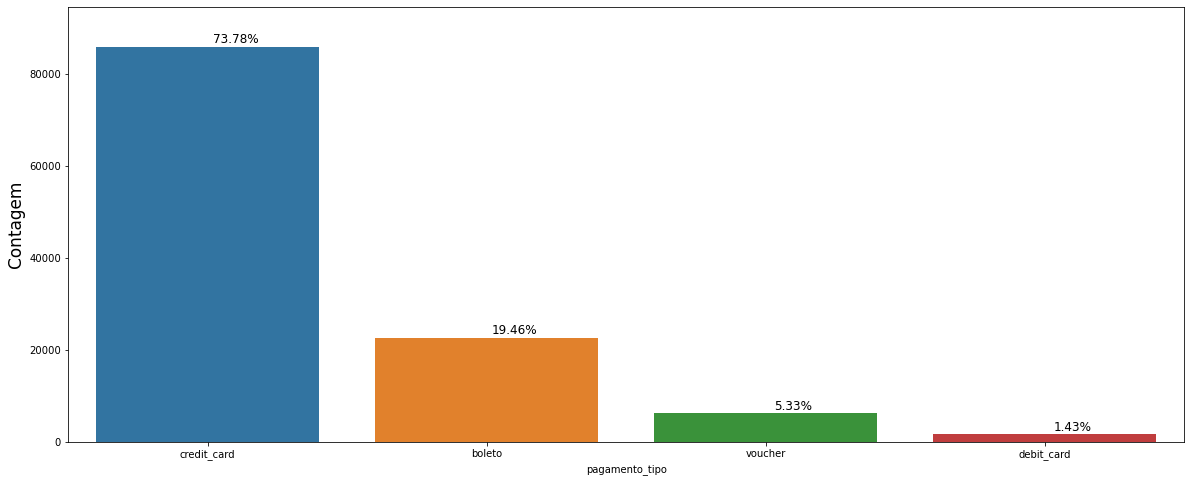

In [8]:
plot_perc('pagamento_tipo', df)
# maioria de pagamentos em cartão de crédito 
# insight: poderíamos incentivar a compra à vista com promoções

# Alguns indicadores que iremos analisar. 

> # Análise RFM

>  ### Recência (R)
> #### Há quantos dias foi a última compra desse cliente 

>  ### Frequência (F)
> #### Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

>  ### Monetariedade (M)
> #### Quanto esse cliente já gastou em dinheiro na sua empresa?

In [9]:
# vamos usar o pacote datetime nessa parte. 

In [10]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]
df_olist.head() ## novos dados. selecionamos apenas algumas variáveis.


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [11]:
df_compra = df.groupby(df['id_unico_cliente']).horario_pedido.max().reset_index()
#df_teste = df.groupby(df['id_unico_cliente']).horario_pedido.max().reset_index()
#df_teste.info()

In [12]:
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra'] #renomeando as colunas
df_compra.head() 

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [13]:
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
df_compra.head() # aplicando a função to_datetime do pandas, converte um objeto em objeto datetime


,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


## Calculando a Recência

In [14]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days
# pego como referência a compra mais recente no banco de dados para contar há quantos dias
# foi a última compra de cada cliente. 

df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


### estou aqui apenas procurando a compra mais recente, pelo índice e pelo .max()

In [15]:
df_compra.index[df_compra['Recencia'] == 0]

Int64Index([93757], dtype='int64')

In [16]:
df_compra.iloc[93757]

id_unico_cliente    ff22e30958c13ffe219db7d711e8f564
DataMaxCompra                    2018-09-03 09:06:57
Recencia                                           0
Name: 93757, dtype: object

In [17]:
df_compra['DataMaxCompra'].max()

Timestamp('2018-09-03 09:06:57')

### -------------------------------------------------------------------------------------------------------------------------

## vamos unir esse banco de dados com o inicial, o df_olist, e chamar o novo 
## BD de df_usuario




In [18]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on = 'id_unico_cliente')
df_usuario.sample(10)
# vamos usar somente as variáveis 'id_unico_cliente' e 'Recencia' do df_compra. 

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
98832,133c1a11944c3c8f0174c08c4f0d24db,5590e685a78102fb3ac27ecf07412750,2017-10-24 13:47:39,1,59.90,313
73989,b1b03100d67e2c8e2a54945e5860496e,932de5979e3351bedd7e46e9864c41b6,2018-02-26 17:21:41,1,69.90,188
36067,40cf64a98f1d821ba358d389ca67da4a,da5c8804f4a52e2e5dc883d06cef4f16,2017-10-04 01:20:14,1,218.00,334
52658,9c7601f15a64084e0e54df80e188eaad,8ac977b83cae48a1d1216f13b06aaa2c,2018-06-25 14:45:20,1,16.50,69
99103,b032eb4f89573f4421aeee6d871f5150,58c80172465a0843a5a1873a6fd21061,2018-03-28 14:31:55,1,53.90,158
86774,1d1bf1e263b0b6dd014d5c94af152c33,e77a8c38dc4133af5160b7909d74883e,2018-01-31 08:57:43,1,29.99,215
59248,f4d0e76d8ffcfaac1e656e7ae4226e6d,c21afced8495ad11eae409dca73ce140,2017-08-13 22:06:23,1,28.90,385
67719,4dfa53e424b44b9dcb3965683078712d,00ba767af52461bf567696d2a6d2909f,2017-10-25 14:58:58,1,45.90,312
90213,be48e539ad60d04b5dd6d8cb869b0c58,fdf2436565d91bfd979b97ec1496511e,2017-08-24 16:00:28,2,110.00,374
33066,15eafe50ec96b4e5f55ce25761a0ca16,430ffe436ef40a76f045f4263b7436dc,2017-03-24 08:27:43,1,113.00,528


## Vamos CLUSTERIZAR os dados a partir da RECÊNCIA,
### Conceitos de Elbow Method

In [19]:
def calcular_wcss(data):
    wcss = [] #criando um vetor vazio
    for k in range(1,10): #  10 = quantidade de clusters. É um chute e pode ser alterado. 
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_ #labels_ dá o cluster ao qual aquele id_cliente pertence.
        wcss.append(kmeans.inertia_) #inertia_ é uma função do kmeans que retorna a soma dos quadrados. 
                                  # Faremos para n_clusters = 2,3,4...10 
    return wcss

In [20]:
from sklearn.cluster import KMeans

In [21]:
df_recencia = df_usuario[['Recencia']] # criando um DF apenas com os valores de Recencia.
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [22]:
# Calculando as inércias para n clusters
soma_quadrados = calcular_wcss(df_recencia)
soma_quadrados

/tmp/ipykernel_375204/288437329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_ #labels_ dá o cluster ao qual aquele id_cliente pertence.
/tmp/ipykernel_375204/288437329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters']=kmeans.labels_ #labels_ dá o cluster ao qual aquele id_cliente pertence.
/tmp/ipykernel_375204/288437329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

[2733029504.942882,
 807902990.2845452,
 362053130.0620208,
 213821000.60650554,
 135876417.3798533,
 96400265.6508172,
 69850866.40210895,
 55680360.1568474,
 44162080.470756754]

> ## Forma da curva de inércia. 3 ou 4 parecem números adequados para o número de
> ## clusters

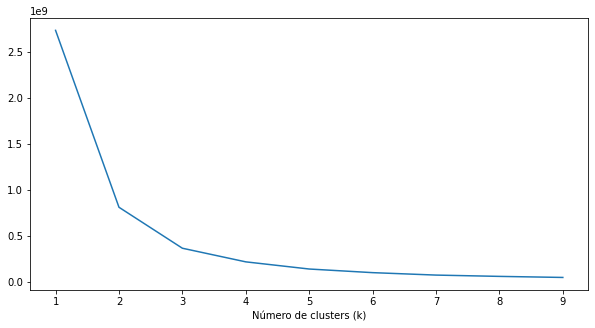

In [23]:
x = np.arange(1,10)
plt.figure(figsize=(10,5))
plt.plot(x,soma_quadrados)
plt.xlabel('Número de clusters (k)')
plt.show()  

#### Mas como podemos identificar se o melhor número de clusters é 3, 4 ou 5? Existe uma solução matemática! Primeiramente, definimos uma reta ligando o primeiro ponto (cluster 1) ao último ponto (cluster 9). Então, calculamos a distância de cada ponto até a reta usando a seguinte equação:

![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)

#### Neste caso, P0 é o ponto do cluster 1 e P1 o ponto do cluster 9. O par (x,y) representa as coordenadas de qualquer ponto que a gente queira calcular a distância. Calculando todas as distância, conseguimos determinar o ponto ideal!

In [24]:
# Codificando a função. Nessa função os índices 0 e 1 representam o primeiro e o último n_cluster, respectivamente.
# e os elementos x e y que aparecem sem índice são a posição (x,y) do n_cluster com o qual o cálculo está sendo feito
# Esse cálculo é feito para todos os n_clusters na curva do cotovelo e toma-se como ótimo aquele que tem
# a maior distância até a reta traçada. 

In [25]:
import math 

def numero_max_clusters(wcss):
    x1, y1 = 2, wcss[1] # Po = começando de 2 clusters. Coloquei a inércia de n=2, wcss[1].
    x2, y2 = 9, wcss[len(wcss)-1] #último ponto. O último índice é o len(objeto)-1, pois a contagem começa em 0.
    
    distancia = []
    for i in range(1,len(wcss)): # range vai de 0 a 'último' - 1:  range (5) = 0,1,2,3,4
        x0 = i+1
        y0 = wcss[i] # o len(wcss) = 9, mas só vai até i = 8, um antes. 
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    
    return distancia.index(max(distancia)) + 1, len(distancia) # soma 2 pq tinha começado 'shiftado' 

In [26]:
numero_max_clusters(soma_quadrados)

# Nesse ponto, tentando entender todos os passos da professora, meu resultado saiu diferente. 
# O número ótimo dela foi 4. Não entendi a lógica dela e acho que ela pode ter se equivocado em alguns pontos.


(3, 8)

### Vou seguir usando n_clusters = 4, o resultado da professora. 

In [27]:
kmeans = KMeans(n_clusters = 4)

In [28]:
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.sample(5)

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
107655,81058233db7f058c4fd5798fd3e5dc19,15beaa3fd34b24664dcb4fa7a31d4406,2018-05-09 12:03:22,4,38.00,116,0
85471,f739a0a9e3c17e8da3d9620d61c02799,528dc37bf184808b81749737c7691680,2017-08-09 20:49:25,1,13.90,389,2
100826,26fffff8099e48dcbe68d143bd5e8ad8,40d877a4b785951fd15560e5e9d60625,2018-08-19 14:51:36,1,357.82,14,0
13453,2e80f02d8e19f90ec5ecf91f5a13811f,462440503feca45c383d83e790692061,2017-10-29 20:52:45,1,34.99,308,2
110268,4b5cf5696f983721f9bff0fc626b2872,649f3d2112888939e5e1664cd6c4f849,2018-01-07 17:00:53,1,238.99,238,3


In [29]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head() #calculando o valor médio das recências por grupo.


,RecenciaCluster,Recencia
0,0,66.790878
1,1,490.622269
2,2,320.233294
3,3,187.911204


In [30]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia',ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head() # ordenando em ordem descrescente

,RecenciaCluster,Recencia
0,1,490.622269
1,2,320.233294
2,3,187.911204
3,0,66.790878


In [31]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado # associando os índices à Recência ordenada. 
# Clientes que estão há mais tempo sem comprar formam o grupo 0.


,RecenciaCluster,Recencia,index
0,1,490.622269,0
1,2,320.233294,1
2,3,187.911204,2
3,0,66.790878,3


In [32]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['RecenciaCluster', 'index']], 
                           on = 'RecenciaCluster')
juntando_cluster.head() # juntando os DF's com os grupos formados. 

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [33]:
removendo_dados = juntando_cluster.drop(['RecenciaCluster'],axis=1)
removendo_dados.head() # removendo a coluna RecenciaCluster, pois não é mais necessária. Agora usaremos os grupos
# com os índices que criamos. Acho que poderia ser nomes como 0 = cliente antigo ou 3 = cliente mais recente...
# Estamos dando pontuação mais alta pros clientes mais recentes. 

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [34]:
df_final = removendo_dados.rename(columns = {'index': 'RecenciaCluster'}) #usamos o nome RecenciaCluster de novo.
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


## Construindo uma função para repetir esses passos para Frequência e Receita

In [56]:
def ordenador_cluster(cluster_nome, target_nome, df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                 ascending=True).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index']], 
                           on = cluster_nome)

    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns = {'index': cluster_nome}) 
    
    return df_final


# trocamos 'RecenciaCluster' por cluster_name, "Recencia" por target_name e "df_usario" por df.

In [54]:
# testando em df_usuario. 
df_usuario = ordenador_cluster('RecenciaCluster', 'Recencia', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Frequencia,FrequenciaCluster,Receita,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0,148.33,0


In [55]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe().reset_index()

,RecenciaCluster,count,mean,std,min,25%,50%,75%,max
0,0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,1,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
2,2,33639.0,187.911204,35.134736,128.0,158.0,187.0,218.0,254.0
3,3,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0


>  # Agora faremos o mesmo para Frequência 

In [57]:
# calculando a frequencia de compra de cada cliente
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.sample(10)

,id_unico_cliente,Frequencia
68712,baa50e17cfa4f8b6b85de04660cecd40,1
74971,cbb0c00ed49accf9709ba41ec1cef8c3,1
70804,c03de2988b6725b520eac2f77e2b1931,1
81504,dd6cd377eeb9f4b456733ea3c0862627,1
28621,4db1ef0722c0e2c670108b4e6fb3c3dc,2
51541,8c4840f05ac6595c7b26b76945a69bde,1
9871,1a9e41c4c1014e20002912d6ad1e00d3,1
15133,2919a0b66e5ea3e6f8188140bb2fac89,1
53274,910f0afb84bc778e856d3683c7e8a46a,10
46727,7ec90d689376a4d8aee359183d6f5b0a,2


In [64]:
df_usuario.drop(columns = ['Frequencia_x', 'Frequencia_y',], inplace = True)

In [65]:
## adicionando ao df_usuario

df_usuario = pd.merge(df_usuario,df_frequencia, on = 'id_unico_cliente')
    
# acho que sempre que dá run, ele cria outra coluna, então vou deixar comentado.
df_usuario.sample(4)



,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,FrequenciaCluster,Receita,RecenciaCluster,Frequencia
97524,89df862586ea3722ee42623686b395b4,d4b016b28c26f2da830da9b0e1d235be,2018-05-08 06:17:06,1,178.99,118,0,198.12,3,1
38404,cfd472b63cf204c38bc6614b64e379f2,51058a70e7b0594b71314346eb64f4cd,2017-12-01 17:03:26,1,49.90,275,0,58.62,1,1
58099,d821b0981be9795c42ff1b2dece149cb,ba89127c5ea50c5071899f1c2b5b71b0,2017-12-23 05:12:58,1,179.99,252,0,226.60,2,2
77473,64f4edd5b6c33fb305990d88886ffb19,4fccee164a7c9613fbf6978a9c4cb72b,2018-02-05 16:33:31,2,49.90,209,0,270.00,2,2


In [41]:
#df_usuario = df_usuario[['id_unico_cliente','id_cliente', 'horario_pedido','item_id',
                     #  'preco', 'Recencia', 'RecenciaCluster', 'Frequencia', 
                      #   'FrequenciaCluster', 'Receita', 'ReceitaCluster' ]]

### agrupando por Frequência

In [66]:
df_frequencia = df_usuario[['Frequencia']]

In [67]:
# aplicando k-means à Frequencia
kmeans = KMeans(n_clusters = 4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)


In [68]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
3,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0


In [69]:
# chamando a função ordenador_cluster para organizar os índices
#e atribuir número maior aos clientes mais recorrentes.

df_usuario = ordenador_cluster('FrequenciaCluster', 'Frequencia', df_usuario)


In [70]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


>  # Agrupando os dados pela Receita

In [71]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Receita,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,146.87,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,140.61,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,142.05,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,155.70,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,148.33,0,1,0


In [73]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()


In [74]:
df_receita.columns = ['id_unico_cliente', 'Receita']


In [75]:
df_usuario = pd.merge(df_usuario, df_receita, on = 'id_unico_cliente')


In [76]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Receita_x,RecenciaCluster,Frequencia,FrequenciaCluster,Receita_y
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,146.87,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,140.61,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,142.05,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,155.70,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,148.33,0,1,0,148.33


In [78]:
#df_usuario.drop(['pagamento_valor'], axis=1, inplace = True)


In [81]:
df_usuario.rename(columns = {"Receita_x": 'Receita'}, inplace = True)
#df_usuario.drop(['Receita_y'], inplace = True)

KeyError: "['Receita_y'] not found in axis"

In [84]:
df_usuario.drop(['Receita_y'], axis = 1, inplace = True)

In [85]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Receita,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,146.87,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,140.61,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,142.05,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,155.70,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,148.33,0,1,0


### Fazendo o agrupamento

In [86]:
kmeans = KMeans(n_clusters = 4)
df_pagamento = df_usuario[['Receita']]

In [87]:
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

In [88]:
# ordenando 

df_usuario = ordenador_cluster('ReceitaCluster', 'Receita', df_usuario)


In [89]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114906.0,261.534879,377.463950,9.59,69.90,132.820,270.00,3083.40
1,1476.0,5904.661585,2894.229316,3090.00,3798.75,4916.605,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.890,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.640,109312.64,109312.64


> # Mapas de calor

In [ ]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [ ]:
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

In [ ]:
# EXERCÍCIO BUGADO

#def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
#    temp = cols
#    cm = sns.light_palette("green", as_cmap=True)
#    return pd.crosstab(df[temp[0]], df[temp[1]],
                      # normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [ ]:
#mapa_calor(df_train[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
#              values=df_train[df['preco'] != -1]['frete'], aggfunc='mean')

 >  # Construindo uma pontuação para os clientes. 

In [90]:
import sys  ## para tirar os warnings que estavam aparecendo 
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [91]:
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster',
                       'Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [92]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + \
                         df_usuario['ReceitaCluster'] 

In [93]:
df_final['Pontuacao'].max() # a maior pontuação que um cliente possui é 7.
# isso pode ser passado para o marketing, por exemplo.

7

In [94]:
df_final['Segmento'] = 'Inativo' # inicialmente todos estão inativos.

In [95]:
df_final.loc[df_final['Pontuacao']>=1,'Segmento'] = 'Business' # não conhecia essa sintaxe 
df_final.loc[df_final['Pontuacao']>=3,'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao']>=5,'Segmento'] = 'Premium'

In [96]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium


In [97]:
df_final.to_csv('RFM.csv')

> ###   exercício deixado pela professora. testar o silhoutte


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))
    
# rodei até 4 clusters e ficou diferente dos resultados que ela disse que daria,
# e o número de clusters indicado por esse método seria 2...

# Análises visuais

## Definiremos uma função para ver como as variáveis RFM se relacionam entre si.

In [98]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid') # definindo a paleta de cores
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=data,size='Segmento',
                    sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()

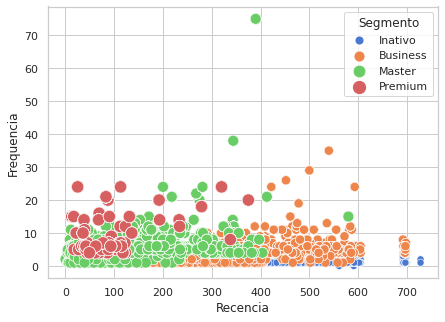

In [99]:
plot_segmento('Recencia', 'Frequencia', df_final)

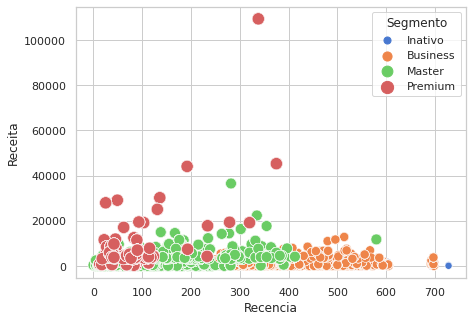

In [100]:
plot_segmento('Recencia', 'Receita', df_final)

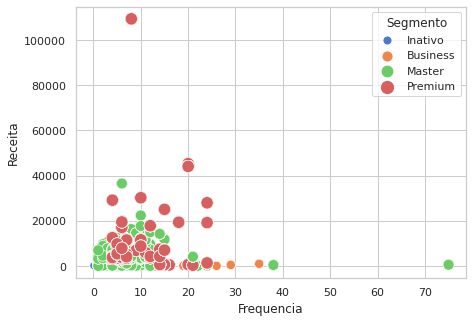

In [102]:
plot_segmento('Frequencia', 'Receita', df_final)

<AxesSubplot:xlabel='Segmento', ylabel='count'>

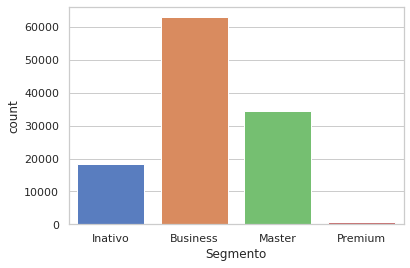

In [103]:
sns.countplot(df_final['Segmento']) 

In [104]:
# fim do curso@ 